In [1]:
# Part 1: Constructing the Datasets

import pandas as pd
import numpy as np

def fetch_grid():
    train = pd.read_csv('haptik_train_data.csv', encoding='UTF-8' )
    test = pd.read_csv('haptik_test_data.csv')
    return train, test

train, test = fetch_grid()

In [2]:
train.head()

,message,food,recharge,support,reminders,travel,nearby,movies,casual,other
0,7am everyday,F,F,F,T,F,F,F,F,F
1,chocolate cake,T,F,F,F,F,F,F,F,F
2,closed mortice and tenon joint door dimentions,F,F,T,F,F,F,F,F,F
3,train eppo kelambum,F,F,F,F,T,F,F,F,F
4,yesterday i have cancelled the flight ticket,F,F,F,F,T,F,F,F,F


In [3]:
test.head()

,message,food,recharge,support,reminders,travel,nearby,movies,casual,other
0,Nearest metro station,F,F,F,F,F,T,F,F,F
1,Pick up n drop service trough cab,F,F,F,F,T,F,F,F,F
2,I wants to buy a bick,F,F,F,F,F,F,F,F,T
3,Show me pizza,T,F,F,F,F,F,F,F,F
4,What is the cheapest package to andaman and ni...,F,F,F,F,T,F,F,F,F


In [4]:
# Part 2: Reversing One-Hot

def reverse_OHE(df):
    for row in df.iloc[:,1:].values:
        for col in range(len(row)):
            if row[col] == 'T':
                row[col] = 1
            else:
                row[col] = 0
    return df

In [5]:
new_train = reverse_OHE(train)
new_test = reverse_OHE(test)

In [6]:
new_train.head()

,message,food,recharge,support,reminders,travel,nearby,movies,casual,other
0,7am everyday,0,0,0,1,0,0,0,0,0
1,chocolate cake,1,0,0,0,0,0,0,0,0
2,closed mortice and tenon joint door dimentions,0,0,1,0,0,0,0,0,0
3,train eppo kelambum,0,0,0,0,1,0,0,0,0
4,yesterday i have cancelled the flight ticket,0,0,0,0,1,0,0,0,0


In [7]:
new_test.head()

,message,food,recharge,support,reminders,travel,nearby,movies,casual,other
0,Nearest metro station,0,0,0,0,0,1,0,0,0
1,Pick up n drop service trough cab,0,0,0,0,1,0,0,0,0
2,I wants to buy a bick,0,0,0,0,0,0,0,0,1
3,Show me pizza,1,0,0,0,0,0,0,0,0
4,What is the cheapest package to andaman and ni...,0,0,0,0,1,0,0,0,0


In [8]:
# Part 3: Splitting into train features, train labels and test target, test labels 

def split(df1, df2):
    X_train = df1.iloc[:,[0]]
    y_train = df1.iloc[:,1:]
    X_test = df2.iloc[:,[0]]
    y_test = df2.iloc[:,1:]
    return(X_train, y_train, X_test, y_test)

X_train, y_train, X_test, y_test = split(new_train, new_test)


In [9]:
# Part 4: Visualize

name = list(y_train.columns.values)
import matplotlib.pyplot as plt
%matplotlib inline

def visualize(dataframe):
    counts = []
    for i in name:
        counts.append(dataframe[i].sum())
    df = pd.DataFrame(counts)
    df = df.T
    df.columns = name
    df.plot(kind = 'bar', figsize=(7,7))
    plt.xlabel('categories')
    plt.ylabel('values')
    plt.title('Distribution values class-wise')
    plt.show()

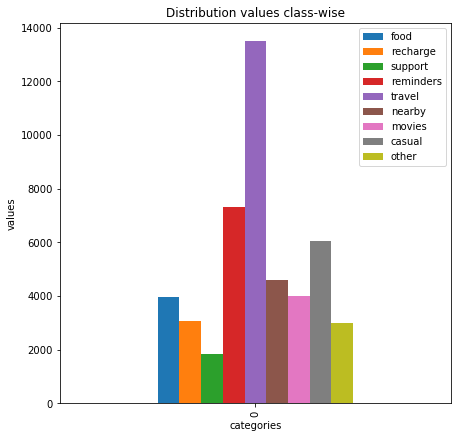

In [10]:
train_visualize = visualize(y_train)

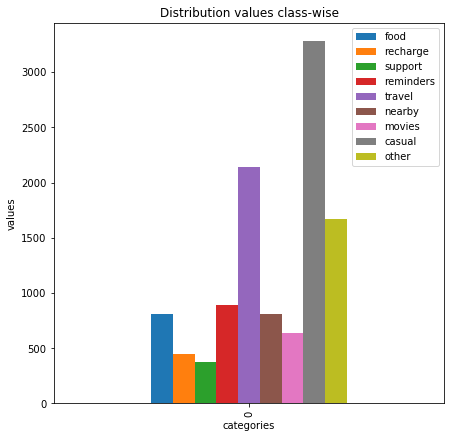

In [11]:
train_visualize = visualize(y_test)

In [12]:
# Part 5: Tokenize 

import nltk
from nltk.tokenize import TreebankWordTokenizer, word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

def tokenize(dataframe):
    dataframe.iloc[:,0] = dataframe.iloc[:,0].apply(lambda row:row.lower())
    dataframe.iloc[:,0] = dataframe.iloc[:,0].apply(lambda sentence:word_tokenize(sentence))
    return dataframe

X_train_tokenized = tokenize(X_train)
X_test_tokenized = tokenize(X_test)

/home/bijit23/miniconda3/envs/py35/lib/python3.5/site-packages/pandas/core/indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [13]:
X_train_tokenized.head()

,message
0,"[7am, everyday]"
1,"[chocolate, cake]"
2,"[closed, mortice, and, tenon, joint, door, dim..."
3,"[train, eppo, kelambum]"
4,"[yesterday, i, have, cancelled, the, flight, t..."


In [14]:
X_test_tokenized.head()

,message
0,"[nearest, metro, station]"
1,"[pick, up, n, drop, service, trough, cab]"
2,"[i, wants, to, buy, a, bick]"
3,"[show, me, pizza]"
4,"[what, is, the, cheapest, package, to, andaman..."


In [23]:
# Part 6: Stopwords removal

stop_words = set(stopwords.words('english'))


new_list = [u'api_nam',u'ka',u'want',u'hey',u'hi',u'user_id',u'task_nam',u'offset api_nam',u'api_nam_exotel',
            u'trains_api',u'product_id',u'a9c0', u'f0af5ee2b89b', u'676951', u'727893', u'55616', u'50', u'16',
            u'exotel',u'ok', u'haptik',u'nearbi', u'offset', u'00', u'pleas', u'can', u'pl',u'drink_water', 
            u'I', u'j', u'se', u'sl', u'10', u'hai', u'll', u'kya', u'rs', u'sorri',u'know', 
            u'30', u'one', u'10 00', u'bu', u'reminder_list',u'plz', u'everi', u'tell',u'plea',u'need',u'offset',
           u'exotel',u'march',u'thank',u'know',u'today',u'everi', u"n't", u'find', u'one', u'go', u'number', 
           u'pl', u'drink_wat', u'nearbi', u'set', u'bu', u'give', u'best', u'day', u'new', u'ok', u'look',
           u'detail', u'much', u'no', u'ye', u'sorri', u'also', u'suggest', u'app', u'chang', u'use', u'hain',
           u'may', u'ask', u'take', u'ac', u'list', u'sir', u'done', u'na', u'alreadi', u'minut', u'right', u'sat',
           u'fri', u'april', u'sun', u"don't", u'may', u'ur', u'good', u'pl', u'api_nam', u'yet', u'pick']

new_list_set = set(new_list)

for word in new_list_set:
    stop_words.add(word)

new_stop_words = set(stop_words)
print(new_stop_words)


def stopwords_removal(dataframe):
    dataframe.iloc[:,0] = dataframe.iloc[:,0].apply(lambda row:[word for word in row if word not in new_stop_words])
    return dataframe

{'does', 'mightn', 'how', 'user_id', 'out', 'a', 'then', '50', 'because', 'doing', 'kya', 'where', 'for', 'ye', 'into', 'use', '55616', 'hai', 'hey', 'ur', 'very', 'was', 'had', 'didn', 'has', 'ain', 'as', 'hasn', 'did', 'offset api_nam', '727893', 's', 'know', 'myself', 'sat', 'may', 'each', 'se', 'offset', 'rs', 'needn', 'not', 'new', 'both', 'are', 'ac', 'until', 'up', 'bu', 'under', 'yours', 'on', 'few', 'sun', 'having', 'reminder_list', 'list', 'in', 'them', 'give', 'is', 'all', 'themselves', 'have', 'everi', 'o', 'f0af5ee2b89b', 'right', 'best', 'number', 't', 'than', 'couldn', 'chang', 'after', 'should', 'were', 'any', 'his', 'above', 'hadn', 'can', 'when', 'some', 'itself', 'herself', 've', 'mustn', 'm', 'also', 'your', 'they', 'these', '676951', 'sorri', 'minut', 'her', 'why', 'much', 'own', 'nor', 'y', 'so', 'app', 'sir', 'look', 'before', 'isn', 'by', 'between', 'wasn', 'their', 'more', 'll', 'same', 'while', 'ok', 'day', 'detail', 'want', 'na', 'be', 'what', 'too', 'pl', 'o

In [24]:
X_train_tokenized_stopword = stopwords_removal(X_train_tokenized)
X_test_tokenized_stopword = stopwords_removal(X_test_tokenized)

/home/bijit23/miniconda3/envs/py35/lib/python3.5/site-packages/pandas/core/indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [25]:
X_train_tokenized_stopword.head()

,message
0,"[7am, everyday]"
1,"[chocol, cake]"
2,"[close, mortic, tenon, joint, door, diment]"
3,"[train, eppo, kelambum]"
4,"[yesterday, cancel, flight, ticket]"


In [26]:
X_test_tokenized_stopword.head()

,message
0,"[nearest, metro, station]"
1,"[n, drop, servic, trough, cab]"
2,"[buy, bick]"
3,"[show, pizza]"
4,"[cheapest, packag, andaman, nicobar]"


In [27]:
# Part 7: Stemming

ps = PorterStemmer()
def stemming(dataframe):
    dataframe.iloc[:,0] = dataframe.iloc[:,0].apply(lambda row:[ps.stem(word) for word in row])
    return dataframe

X_train_tokenized_stopword_stemmed = stemming(X_train_tokenized_stopword)
X_test_tokenized_stopword_stemmed = stemming(X_test_tokenized_stopword)

/home/bijit23/miniconda3/envs/py35/lib/python3.5/site-packages/pandas/core/indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [28]:
X_train_tokenized_stopword_stemmed.head()

,message
0,"[7am, everyday]"
1,"[chocol, cake]"
2,"[close, mortic, tenon, joint, door, diment]"
3,"[train, eppo, kelambum]"
4,"[yesterday, cancel, flight, ticket]"


In [29]:
X_test_tokenized_stopword_stemmed.head()

,message
0,"[nearest, metro, station]"
1,"[n, drop, servic, trough, cab]"
2,"[buy, bick]"
3,"[show, pizza]"
4,"[cheapest, packag, andaman, nicobar]"


[('remind', 1.0), ('cancel', 0.4717664092664093), ('book', 0.44425675675675674), ('train', 0.4181949806949807), ('ticket', 0.3885135135135135), ('call', 0.37572393822393824), ('pm', 0.3269787644787645), ('flight', 0.27895752895752896), ('offer', 0.271476833976834), ('time', 0.2446911196911197), ('movi', 0.24396718146718147), ('near', 0.24107142857142858), ('wake', 0.2401061776061776), ('water', 0.21163127413127414), ('help', 0.18074324324324326), ('everyday', 0.18026061776061775), ('avail', 0.1788127413127413), ('check', 0.17833011583011582), ('drink', 0.17422779922779924), ('show', 0.17277992277992277), ('recharg', 0.16964285714285715), ('delhi', 0.15805984555984556), ('cab', 0.15757722007722008), ('hour', 0.1500965250965251), ('servic', 0.1361003861003861), ('bank', 0.13223938223938225), ('hotel', 0.12306949806949807), ('mumbai', 0.11969111969111969), ('bill', 0.11510617760617761), ('order', 0.11438223938223938), ('send', 0.11269305019305019), ('tomorrow', 0.11027992277992278), ('loc

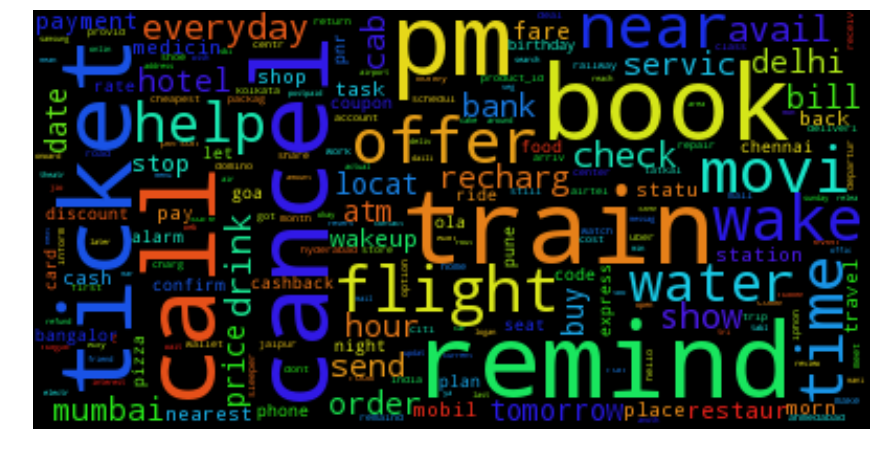

In [30]:
# Part 8: Wordcloud

def wordcloud(dataframe):
    text_wordcloud = dataframe.iloc[:,0].apply(lambda row:[word for word in row])
    new_l = []
    for row in text_wordcloud:
        for word in row:
            new_l.append(word)
    all_text = ' '.join(new_l)
    wordcloud = WordCloud(max_font_size=50).generate(all_text)
    plt.figure(figsize = (15,15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    print(wordcloud.words_)
train_wordcloud = wordcloud(X_train_tokenized_stopword_stemmed)
train_wordcloud

In [32]:
# Part 9: Count Vectorizer

from sklearn.feature_extraction.text import CountVectorizer
tokenizer = TreebankWordTokenizer()
def vectorizer(series1, series2):
    vector = CountVectorizer(stop_words = new_stop_words, ngram_range = (1, 2), tokenizer = tokenizer.tokenize, min_df = 2, max_df = 0.5)
    vectorized_1 = vector.fit_transform(series1)
    vectorized_2 = vector.transform(series2)
    return(vectorized_1, vectorized_2)
            
vectorized_train, vectorized_test = vectorizer(train['message'], test['message'])

In [33]:
vectorized_train

<40659x19798 sparse matrix of type '<class 'numpy.int64'>'
	with 234492 stored elements in Compressed Sparse Row format>

In [34]:
vectorized_test

<10000x19798 sparse matrix of type '<class 'numpy.int64'>'
	with 39001 stored elements in Compressed Sparse Row format>

In [39]:
from sklearn.model_selection import KFold, cross_val_score
# x_train, x_validate, Y_train, Y_validate = train_test_split(vectorized_train, y_train, 
#                                                             test_size=0.2, random_state=42)
# kfold = KFold(n_splits = 10, random_state=42)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
a = np.array(y_test.values.astype(int))

models = []
models.append(('RF', RandomForestClassifier()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('OVR-MNB', OneVsRestClassifier(MultinomialNB())))
models.append(('LR', OneVsRestClassifier(LogisticRegression())))
# evaluate each model in turn
results = []
names = []


for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, vectorized_train, y_train.astype(int), cv=kfold,
                                                 scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    model.fit(vectorized_train, y_train.astype(int))
    pred = model.predict(vectorized_test)
    la = " %s: %f" % (name, (np.sum(np.array(pred == a))/(pred.shape[0]*pred.shape[1])))
    print(la)
    over_accuracy = "%s: %f" % (name, metrics.accuracy_score(y_test.astype(int).values, pred))
    print(over_accuracy)


RF: 0.629131 (0.092356)
 RF: 0.935811
RF: 0.657400
CART: 0.628172 (0.092018)
 CART: 0.929256
CART: 0.644800
OVR-MNB: 0.581217 (0.146680)
 OVR-MNB: 0.934089
OVR-MNB: 0.602100
LR: 0.616904 (0.154954)
 LR: 0.943633
LR: 0.634700


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[100,200], 'max_depth':[2000,3000]}
classifier = GridSearchCV(RandomForestClassifier(), parameters)
classifier.fit(vectorized_train, y_train.astype(int))
y_pred = classifier.predict(vectorized_test)

label_accuracy = np.sum(np.array(y_pred == a))/(y_pred.shape[0]*y_pred.shape[1])
print(label_accuracy)

overall_accuracy = metrics.accuracy_score(y_test.astype(int).values, y_pred)
print(overall_accuracy)

In [36]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)

In [37]:
clf.fit(vectorized_train, y_train.astype(int))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
y_pred = clf.predict(vectorized_test)

In [42]:
from sklearn import metrics
a = np.array(y_test.values.astype(int))
lb = np.sum(np.array(y_pred == a))/(y_pred.shape[0]*y_pred.shape[1])
print(lb)
ovr_acc = metrics.accuracy_score(y_test.astype(int).values, y_pred)
print(ovr_acc)

0.937266666667
0.6608
